In [9]:
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Define the root directory of the project as credit-mlops
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(ROOT_DIR)

/workspaces/credit-mlops


In [11]:
# Read the processed data
df = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'processed', 'processed_data.csv'))
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

In [14]:
# Apply PCA with 6 components
pca = PCA(n_components=6)
data_pca = pca.fit_transform(data_standardized)

## Training

### Decide on number of clusters

#### Elbow method

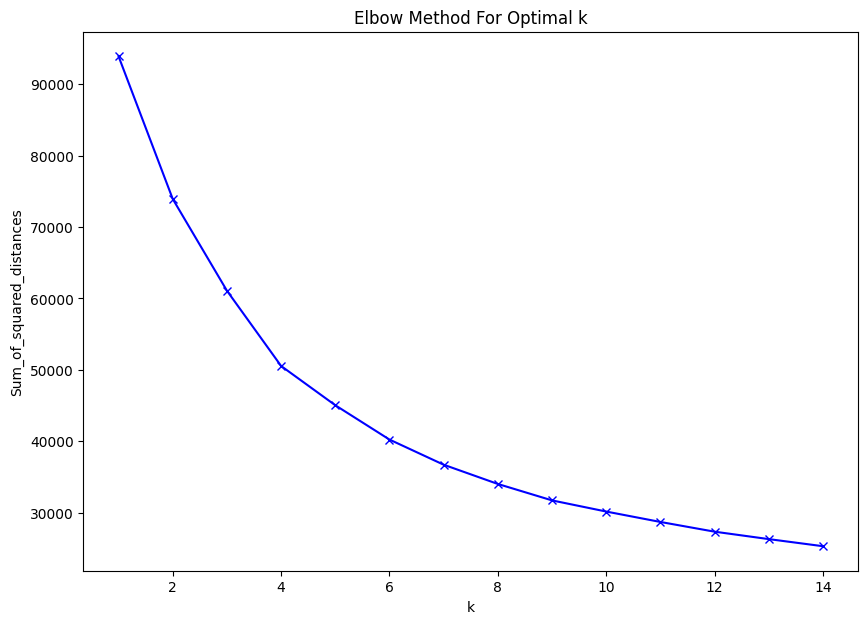

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.cluster import KMeans

# List to hold the sum of squared distances
ssd = []

# Range of k values to try
k_values = range(1, 15)

for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the PCA-transformed data
    kmeans.fit(data_pca)
    # Append the inertia (sum of squared distances) to the list
    ssd.append(kmeans.inertia_)

# Plot the SSD for each k value
plt.figure(figsize=(10, 7))
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Save elbow plot
plt.savefig(os.path.join(ROOT_DIR, 'reports', 'figures', 'elbow_plot.png'))


#### Silhouette analysis

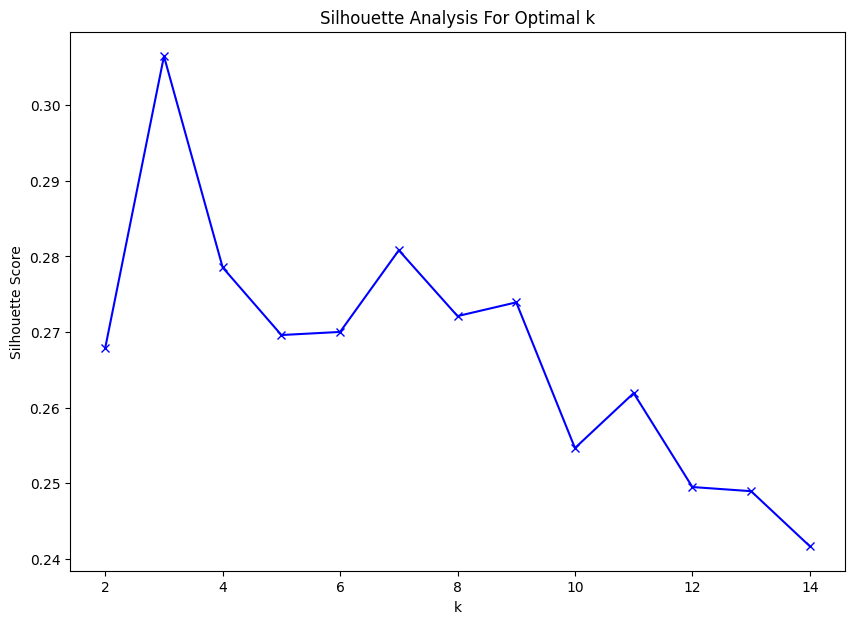

<Figure size 640x480 with 0 Axes>

In [16]:
from sklearn.metrics import silhouette_score

# List to hold the silhouette scores
sil_scores = []

# Range of k values to try
k_values = range(2, 15)  # Silhouette analysis is not applicable for k=1

for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the PCA-transformed data and predict the cluster labels
    labels = kmeans.fit_predict(data_pca)
    # Compute the silhouette score and append it to the list
    sil_scores.append(silhouette_score(data_pca, labels))

# Plot the silhouette score for each k value
plt.figure(figsize=(10, 7))
plt.plot(k_values, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Save silhouette plot
plt.savefig(os.path.join(ROOT_DIR, 'reports', 'figures', 'silhouette_plot.png'))


The first plot shows the sum of squared distances (SSD) for different numbers of clusters, k, as per the Elbow Method. In this case, the "elbow" point isn't very clear, but there seems to be a slight elbow at around k=3 or k=4.

The second plot shows the Silhouette Scores for different numbers of clusters, k. The silhouette score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. In this case, the silhouette score seems to be highest at around k=2 or k=3.

Based on both the elbow method and silhouette analysis, it seems that 2 or 3 clusters could be a good choice for this dataset. The final decision could depend on the specific requirements of your project and any further insights you have about the data.

Once you've decided on the optimal number of clusters, you can create a final KMeans model with that number of clusters, fit it to the data, and then use it to assign cluster labels to the data points. After that, you could analyze the characteristics of the different clusters, and use these cluster labels as inputs for other tasks or as a basis for business decisions.

### Training the model

In [17]:
# Create a KMeans instance with an arbitrary number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the PCA-transformed data
kmeans.fit(data_pca)

KMeans(n_clusters=3)

In [ ]:
# Save the model
joblib.dump(kmeans, 'model.pkl')